In [1]:
import numpy as np
import pandas as pd
import re
from collections import Counter

In [11]:
df = pd.read_excel('/Users/dongxujia/Dropbox/DS-Discovery_GenderDiversity/04_Data/raw/jobads_20152017_applicants.xlsx')

In [12]:
df.shape

(6471, 16)

In [13]:
df.columns

Index(['id', 'job_title_original', 'job_requirement_en', 'job_description_en',
       'job_category', 'length_requirement', 'length_description',
       'job_title_clean', 'job_field', 'job_position', 'job_level', 'job_rank',
       'degree_vocational', 'degree_academic', 'total_candidates',
       'female_share'],
      dtype='object')

In [14]:
df.head()

,id,job_title_original,job_requirement_en,job_description_en,job_category,length_requirement,length_description,job_title_clean,job_field,job_position,job_level,job_rank,degree_vocational,degree_academic,total_candidates,female_share
0,9,central sap key user sd for the area plt oe,maintenance and further development of the glo...,maintenance and further development of the glo...,marketing_and_sales,166,166,key user,NaN,NaN,NaN,NaN,0,1,1,0.0
1,46,system engineer automotive security privacy,university degree in computer science or equi...,university degree in computer science or equi...,engineering,83,83,engineer,system,engineer,NaN,NaN,0,1,1,0.0
2,1086,lnd_150110_transferstelle pd,development of platform components for adas sy...,development of platform components for adas sy...,engineering,250,250,missing,NaN,NaN,NaN,NaN,0,1,1,1.0
3,1663,logistic,logistic development and implementation of the...,logistic development and implementation of the...,manufacturing_operations_and_production,25,25,missing,NaN,NaN,NaN,NaN,0,0,1,0.0
4,1733,central key user manufacturing controlling suite,implement manufacturing accounting standard in...,implement manufacturing accounting standard in...,information_technology,123,123,key user,NaN,NaN,NaN,NaN,0,0,1,0.0


# genderdecoder 

In [15]:
import os 
os.getcwd()

'/Users/dongxujia/Desktop/Research'

In [16]:
import sys
sys.path.append('genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/assess')

In [17]:
from genderDecoder import assess

In [18]:
# example of genderDecoder

assess("independent strong interpersonal dominant polite driven")

{'result': 'masculine-coded',
 'explanation': 'This job ad uses more words that are stereotypically masculine than words that are stereotypically feminine. It risks putting women off applying, but will probably encourage men to apply.',
 'masculine_coded_words': ['independent', 'dominant', 'dominant', 'driven'],
 'feminine_coded_words': ['interpersonal', 'interpersonal', 'polite']}

In [ ]:
# the original word lists

In [28]:
f = open('/Users/dongxujia/Desktop/Research/genderDecoder/genderDecoder/wordlists_v0.py', 'r')

In [29]:
a = f.read()

In [30]:
print(a)

feminine_coded_words = [
    "agree",
    "affectionate",
    "child",
    "cheer",
    "collab",
    "commit",
    "communal",
    "compassion",
    "connect",
    "considerate",
    "cooperat",
    "co-operat",
    "depend",
    "emotiona",
    "empath",
    "feel",
    "flatterable",
    "gentle",
    "honest",
    "interpersonal",
    "interdependen",
    "interpersona",
    "inter-personal",
    "inter-dependen",
    "inter-persona",
    "kind",
    "kinship",
    "loyal",
    "modesty",
    "nag",
    "nurtur",
    "pleasant",
    "polite",
    "quiet",
    "respon",
    "sensitiv",
    "submissive",
    "support",
    "sympath",
    "tender",
    "together",
    "trust",
    "understand",
    "warm",
    "whin",
    "enthusias",
    "inclusive",
    "yield",
    "shar"]

masculine_coded_words = [
    "active",
    "adventurous",
    "aggress",
    "ambitio",
    "analy",
    "assert",
    "athlet",
    "autonom",
    "battle",
    "boast",
    "challeng",
    "champion",
    "co

In [31]:
f.close()

In [32]:
feminine_coded_words = [
    "agree",
    "affectionate",
    "child",
    "cheer",
    "collab",
    "commit",
    "communal",
    "compassion",
    "connect",
    "considerate",
    "cooperat",
    "co-operat",
    "depend",
    "emotiona",
    "empath",
    "feel",
    "flatterable",
    "gentle",
    "honest",
    "interpersonal",
    "interdependen",
    "interpersona",
    "inter-personal",
    "inter-dependen",
    "inter-persona",
    "kind",
    "kinship",
    "loyal",
    "modesty",
    "nag",
    "nurtur",
    "pleasant",
    "polite",
    "quiet",
    "respon",
    "sensitiv",
    "submissive",
    "support",
    "sympath",
    "tender",
    "together",
    "trust",
    "understand",
    "warm",
    "whin",
    "enthusias",
    "inclusive",
    "yield",
    "shar"]

In [33]:
masculine_coded_words = [
    "active",
    "adventurous",
    "aggress",
    "ambitio",
    "analy",
    "assert",
    "athlet",
    "autonom",
    "battle",
    "boast",
    "challeng",
    "champion",
    "compet",
    "confident",
    "courag",
    "decid",
    "decision",
    "decisive",
    "defend",
    "determin",
    "domina",
    "dominant",
    "driven",
    "fearless",
    "fight",
    "force",
    "greedy",
    "head-strong",
    "headstrong",
    "hierarch",
    "hostil",
    "implusive",
    "independen",
    "individual",
    "intellect",
    "lead",
    "logic",
    "objective",
    "opinion",
    "outspoken",
    "persist",
    "principle",
    "reckless",
    "self-confiden",
    "self-relian",
    "self-sufficien",
    "selfconfiden",
    "selfrelian",
    "selfsufficien",
    "stubborn",
    "superior",
    "unreasonab"]

In [ ]:
# some modifications

In [35]:
remove_female = [
    "agree",
    "commit",
    "feel",
    "support",
    "enthusias",
    "yield"]

In [36]:
add_female = [
    "team",
    "communicat",
    "flexib",
    "team-player",
    "team-capability"
]

In [37]:
remove_male = [
    "unreasonab"]

In [38]:
add_male = [
    "self-driven",
    "selfdriven",
    "self-motivated",
    "selfmotivated",
    "problem-solving",
    "mathematical",
    "leadership",
    "maintain",
    "manage",
    "monitor",
    "strateg",
    "travel",
    "supervis",
    "proactive",
    "pressure"
]

In [44]:
feminine_coded_words.extend(add_female)

In [49]:
for x in remove_female:
    feminine_coded_words.remove(x)

In [51]:
masculine_coded_words.extend(add_male)

In [52]:
for z in remove_male:
    masculine_coded_words.remove(z)

In [55]:
feminine_coded_words

['affectionate',
 'child',
 'cheer',
 'collab',
 'communal',
 'compassion',
 'connect',
 'considerate',
 'cooperat',
 'co-operat',
 'depend',
 'emotiona',
 'empath',
 'flatterable',
 'gentle',
 'honest',
 'interpersonal',
 'interdependen',
 'interpersona',
 'inter-personal',
 'inter-dependen',
 'inter-persona',
 'kind',
 'kinship',
 'loyal',
 'modesty',
 'nag',
 'nurtur',
 'pleasant',
 'polite',
 'quiet',
 'respon',
 'sensitiv',
 'submissive',
 'sympath',
 'tender',
 'together',
 'trust',
 'understand',
 'warm',
 'whin',
 'inclusive',
 'shar',
 'team',
 'communicat',
 'flexib']

In [56]:
masculine_coded_words

['active',
 'adventurous',
 'aggress',
 'ambitio',
 'analy',
 'assert',
 'athlet',
 'autonom',
 'battle',
 'boast',
 'challeng',
 'champion',
 'compet',
 'confident',
 'courag',
 'decid',
 'decision',
 'decisive',
 'defend',
 'determin',
 'domina',
 'dominant',
 'driven',
 'fearless',
 'fight',
 'force',
 'greedy',
 'head-strong',
 'headstrong',
 'hierarch',
 'hostil',
 'implusive',
 'independen',
 'individual',
 'intellect',
 'lead',
 'logic',
 'objective',
 'opinion',
 'outspoken',
 'persist',
 'principle',
 'reckless',
 'self-confiden',
 'self-relian',
 'self-sufficien',
 'selfconfiden',
 'selfrelian',
 'selfsufficien',
 'stubborn',
 'superior',
 'self-driven',
 'selfdriven',
 'self-motivated',
 'selfmotivated',
 'team-player',
 'team-capability',
 'problem-solvingmathematical',
 'leadership',
 'maintain',
 'manage',
 'monitor',
 'strateg',
 'travel',
 'supervis',
 'proactive',
 'pressure']

In [54]:
# construct a new wordslist.py in the folder using the updated two lists

In [ ]:
#apply gender decoder on job_requirements and job_description separately

In [57]:
df['job_requirement_decoder'] = df.job_requirement_en.dropna().apply(assess)

In [58]:
# 1 row has null value

df.job_requirement_decoder.isnull().value_counts()

False    6470
True        1
Name: job_requirement_decoder, dtype: int64

In [59]:
df['job_requirement_result'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_requirement_masculine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_requirement_feminine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [61]:
df['job_description_decoder'] = df.job_description_en.dropna().apply(assess)

In [62]:
# 1 row has null value

df.job_description_decoder.isnull().value_counts()

False    6470
True        1
Name: job_description_decoder, dtype: int64

In [66]:
df['job_description_result'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_description_masculine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_description_feminine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [72]:
# this entry has neither job_requirement nor job_description

In [71]:
df[(df.job_description_decoder.isnull()) | (df.job_requirement_decoder.isnull())]

,id,job_title_original,job_requirement_en,job_description_en,job_category,length_requirement,length_description,job_title_clean,job_field,job_position,...,total_candidates,female_share,job_requirement_decoder,job_requirement_result,job_requirement_masculine_coded_words,job_requirement_feminine_coded_words,job_description_decoder,job_description_result,job_description_masculine_coded_words,job_description_feminine_coded_words
8,2264,leader platform team,NaN,NaN,engineering,0,0,leader,NaN,NaN,...,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.job_requirement_result.unique()

array(['feminine-coded', 'strongly masculine-coded',
       'strongly feminine-coded', 'neutral', nan, 'masculine-coded'],
      dtype=object)

In [74]:
# count results for job_requirement

df.job_requirement_result.value_counts()

strongly masculine-coded    2791
neutral                     1907
masculine-coded              892
strongly feminine-coded      547
feminine-coded               333
Name: job_requirement_result, dtype: int64

In [75]:
# count results for job_description

df.job_description_result.value_counts()

feminine-coded              1960
strongly feminine-coded     1432
neutral                     1301
masculine-coded             1199
strongly masculine-coded     578
Name: job_description_result, dtype: int64

In [76]:
# create numerical value mapping for the result, 
decoder_result_mapping = {
    "strongly feminine-coded" : -2, 
    "feminine-coded" : -1,
    "neutral": 0,
    "masculine-coded": 1,
    "strongly masculine-coded": 2}

In [77]:
# Assign a score for each entry's job_requirement_result and job_description_result

df['job_requirement_score'] = df.job_requirement_result.map(decoder_result_mapping)

In [78]:
df['job_description_score'] = df.job_description_result.map(decoder_result_mapping).astype(float)

In [79]:
df[df['job_requirement_score'] > df['job_description_score']].shape[0]/df.shape[0]

0.6280327615515376

In [ ]:
# About 63% of the entries have a higher job_requirement_score, 
# which means their job_requirement are more masculine_coded than their job_description

In [ ]:
# adding the two scores together for each entry

In [80]:
# combine ench entry's job_requirement_result with job_description_result

df['combined_score'] = df.job_requirement_score + df.job_description_score

In [81]:
df.combined_score.value_counts()

 0.0    1474
 1.0    1275
 2.0     925
-2.0     754
-1.0     749
 3.0     594
 4.0     317
-4.0     194
-3.0     188
Name: combined_score, dtype: int64

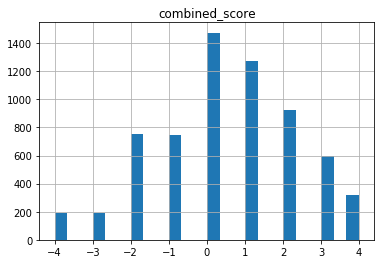

In [83]:
df.hist(column = 'combined_score',bins = 24);

In [104]:
df.groupby('combined_score')['female_share'].mean()

combined_score
-4.0    0.246686
-3.0    0.217190
-2.0    0.259877
-1.0    0.224429
 0.0    0.246484
 1.0    0.227045
 2.0    0.240139
 3.0    0.239784
 4.0    0.268720
Name: female_share, dtype: float64

In [106]:
df.groupby('job_requirement_score')['female_share'].mean()

job_requirement_score
-2.0    0.235279
-1.0    0.240899
 0.0    0.246402
 1.0    0.205213
 2.0    0.248449
Name: female_share, dtype: float64

In [107]:
df.groupby('job_description_score')['female_share'].mean()

job_description_score
-2.0    0.248905
-1.0    0.228703
 0.0    0.258598
 1.0    0.226526
 2.0    0.246620
Name: female_share, dtype: float64